# Sobre o Conjunto de Dados

#### Este conjunto de dados de pacientes com câncer de mama que foi obtido a partir do Programa SEER do NCI, o qual fornece informações sobre estatísticas de câncer. O conjunto de dados possui apenas pacientes do sexo feminino com câncer de mama de ducto infiltrante e carcinoma lobular diagnosticadas entre 2006-2010.

# Case

## Importe o dataset 'dataset_cancer'
* Dica 1: Cuidado porque o separador de colunas não é mesmo usado como default pelo pandas.
* Dica 2: Cuidado porque o separador de decimal não é "." e sim ","

In [1]:
import math
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./dataset_cancer.csv', sep = ";", decimal=",",index_col= 0)

### Verifique se há dados faltantes e remova as linhas com esses dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4018 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4018 non-null   float64
 10  Estrogen Status         4024 non-null   int64  
 11  Progesterone Status     4024 non-null   int64  
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [4]:
df.head(1)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,1,1,24,1,60,0


In [5]:
df.fillna(df[["Age", "Tumor Size"]].median()[0], inplace=True)

In [6]:
df["Survival Year"] = [x//12 for x in df["Survival Months"]]

### Remova a coluna 'Grade' do conjunto de dados

In [7]:
df.drop(["Grade"], axis = 1, inplace=True)

## Troque o nome da coluna differentiate para Differentiate (com letra maiúscula)

In [8]:
df.rename(columns= {"differentiate" :"Differentiate"}, inplace = True)

## Fique apenas com a primeira palavra nos campos da coluna Differentiate

Note que os valores possíveis para a coluna Differentiate são 'Moderately differentiated', 'Poorly differentiated' e 'Well differentiated'. O que queremos aqui é descartar a palavra 'differentiated' desses campos. Tente fazer isso tratando essas strings usando .split().

In [9]:
# df["Differentiate"] = df['Differentiate'].str.join("").str.split("differentiated", expand = True)

df['Differentiate']= df['Differentiate'].apply(lambda x:x.replace("differentiated", "")).str.capitalize()

# df['Differentiate']= df['Differentiate'].apply(lambda x:x.join("differentiated").split(""))

## Remova todas as linhas do dataframe onde:
* Marital Status = Separated
* differentiate = Undifferentiated
* 6th Stage = IIIB

In [10]:
df_condicao = df[(df["Marital Status"] == "Separated") | (df["Differentiate"] == "Undifferentiated") | (df["6th Stage"] == "IIIB")]

df = df.drop(df_condicao.index)

### Criando dados para Treino para modelagem Machine Learning 

In [11]:
df_Treino = df.copy()

### Substitua os valores das colunas 'Status', 'Estrogen Status' e 'Progesterone Status' da seguinte maneira
* Para a coluna Status: Substitua 1 por Morta e 0 por Viva
* Para a coluna Estrogen Status: Substitua 1 por Ok e 0 por Não Ok
* Para a coluna Progesterone Status: Substitua 1 por Ok e 0 por Não Ok

In [12]:
df["Status"] = ["Viva" if x == 0 else "Morta" for x in df["Status"]]
df["Estrogen Status"] = ["Não Ok" if j == 0 else "Ok" for j in df["Estrogen Status"]]
df["Progesterone Status"] = ["Não Ok" if l == 0 else "Ok" for l in df["Progesterone Status"]]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3912 non-null   float64
 1   Race                    3912 non-null   object 
 2   Marital Status          3912 non-null   object 
 3   T Stage                 3912 non-null   object 
 4   N Stage                 3912 non-null   object 
 5   6th Stage               3912 non-null   object 
 6   Differentiate           3912 non-null   object 
 7   A Stage                 3912 non-null   object 
 8   Tumor Size              3912 non-null   float64
 9   Estrogen Status         3912 non-null   object 
 10  Progesterone Status     3912 non-null   object 
 11  Regional Node Examined  3912 non-null   int64  
 12  Reginol Node Positive   3912 non-null   int64  
 13  Survival Months         3912 non-null   int64  
 14  Status                  3912 non-null   

### IMPORTANDO AS BIBLIOTECAS PARA ANALISE DOS DADOS 

In [13]:
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
import shap
from pandas_profiling import ProfileReport

## Verifique a distribuição de mulheres por raça (Race) e depois faça um gáfico de pizza

In [15]:
fig = px.pie(df,  names='Race')
fig.show()

## Faça um histograma para a variável Survival Months

In [16]:
fig = px.histogram(df, x="Survival Months", barmode='group')
fig.update_layout(bargap=0.2)
fig.show()

In [17]:
# porcentagem_progressao = round(df['Survival Months'].value_counts(normalize=True)*100,2)
fig = px.histogram(df, x="Status", color= 'Race', barmode='group', text_auto= True)
fig.show()

In [18]:
fig = px.histogram(df, x="Race", color="Race", pattern_shape="Status", text_auto= True, barnorm= 'percent')
fig.show()

## Faça novamente o histograma para a variável Survival Months mas dessa vez um para cada classe da variável Status
* Dica 1: Se você estiver usando o seaborn talvez seja preciso apenas setar o argumento hue
* Dica 2: Tente deixar o eixo Y na escala de percentual para facilitar a comparação dos histogramas.


In [19]:
fig = px.histogram(df, x="Survival Year", color= 'Status', barmode='group')
fig.show()

In [20]:
fig = px.box(df, x="Survival Year", color= 'Status')
fig.show()

### Status de sobrevivencia por idade 

In [21]:
fig = px.box(df, x="Age",color= 'Status')
fig.show()

### Relação entre Status de sobrevivencia x Anos de Sobrevivencia x Idade 

In [51]:
fig = px.box(df, x="Age", y= "Survival Year" ,color= 'Status')
fig.show()

**O que você percebe ao comprara os histogramas?**

Os maiores indices são de mulheres que sobreviveram 

## Faça um gráfico de barras para a coluna Differentiate
* Dica: Talvez você não consiga fazer direto em cima do seu dataframe original

In [22]:
df.Differentiate.value_counts()

Moderately     2292
Poorly         1075
Well            527
Un               18
Name: Differentiate, dtype: int64

In [55]:
fig = px.histogram(df, x="Differentiate", barmode="group")
fig.show()

## Faça novamente o gráfico de barras para a coluna Differentiate mas agrupando pela coluna Status (semelhante ao que você fez antes para Survival Months)
* Dica 1: Talvez você não consiga fazer direto em cima do seu dataframe original
* Dica 2: Tente contar as ocorrências, armazenar os resultados em um objeto e depois usar esse objeto para montar o gráfico

In [23]:
fig = px.histogram(df, x="Differentiate", y='Age' ,color="Differentiate", pattern_shape="Status", text_auto= True, barnorm= 'percent')
fig.show()

**O que você percebeu?**

O indice de mulheres "moderately" é bem maior se comparado aos outros valores, o numero de mulheres pobres vem em seguida e por ultimo as mulheres com mais condição.

### Explore os dados em busca de relações entre a variável 'Status' e as demais variáveis
* ***Importante***: Nosso foco aqui é tentar descobri o que pode estar relacionado a uma maior propensão à morte, beleza?
* ***Observação***: A variável 'Status' refere-se ao desfecho do paciente e assume o valor 1 caso o paciente tenha falecido e zero caso contrário.
* ***Dica***: A utilização de gráficos pode ser uma boa forma de obter insights de forma rápida. A escolha do tipo de gráfico e aforma como eles são montados é fundamental para insights mais precisos.

In [24]:
df.head(1)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival Year
0,68.0,White,Married,T1,N1,IIA,Poorly,Regional,4.0,Ok,Ok,24,1,60,Viva,5


In [25]:
# sbn.displot(df, x="Race", hue="Status", multiple = "dodge")

fig = px.histogram(df, x="Estrogen Status", y='Age' ,color="Estrogen Status", pattern_shape="Status", text_auto= True, barnorm= 'percent')
fig.show()

In [26]:
# sbn.displot(df, x="Age", y="Tumor Size", hue="Status")
fig = px.histogram(df, x="Progesterone Status", y='Age' ,color="Progesterone Status", pattern_shape="Status", text_auto= True, barnorm= 'percent')
fig.show()

In [35]:
# # sbn.relplot(data=df, x="Tumor Size", y="Age", hue="Differentiate")

# sbn.catplot(data=df, kind="bar", x="Differentiate", y="Age", hue="Status")

In [36]:
# sbn.catplot(data=df, kind="bar", x="Survival Months", y="Tumor Size", hue="Status")

In [37]:
# sbn.catplot(data=df, kind="bar", x="Survival Months", y="Tumor Size", hue="Race")

In [38]:
# sbn.catplot(data=df, kind="bar", x="Status", y="Survival Months", hue="Race")

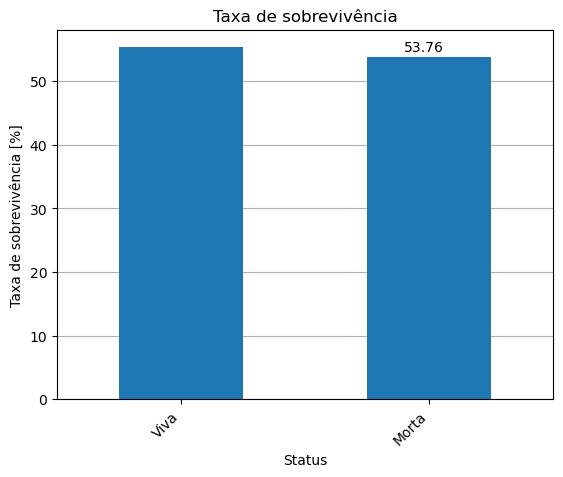

In [69]:
# Taxa de Sobrevivencia 
ax = df.groupby(by=['Status'])['Age']\
    .mean()\
    .multiply(1)\
    .plot.bar(title='Taxa de sobrevivência')
    
plt.ylabel('Taxa de sobrevivência [%]')
plt.xlabel('Status')
plt.xticks([0,1],['Viva','Morta'], rotation= 45, ha='right')
ax.set_axisbelow(True)
plt.grid(axis='y')

x_offset = -.1
y_offset = 0.9

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)
    
ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

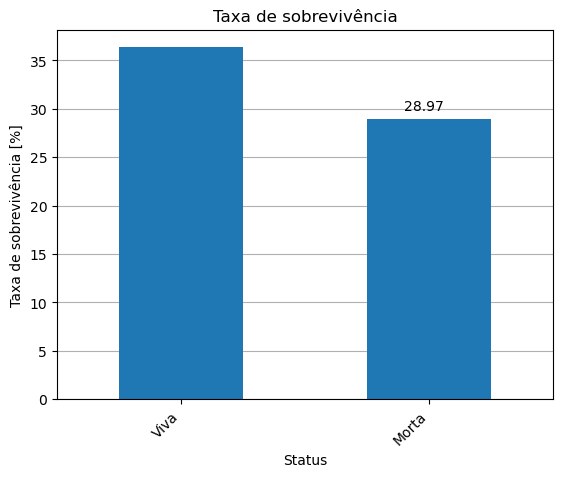

In [52]:
# Taxa de Sobrevivencia 
ax = df.groupby(by=['Status'])['Tumor Size']\
    .mean()\
    .multiply(1)\
    .plot.bar(title='Taxa de sobrevivência')
    
plt.ylabel('Taxa de sobrevivência [%]')
plt.xlabel('Status')
plt.xticks([0,1],['Viva','Morta'], rotation= 45, ha='right')
ax.set_axisbelow(True)
plt.grid(axis='y')

x_offset = -.1
y_offset = 0.9

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)
    
ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

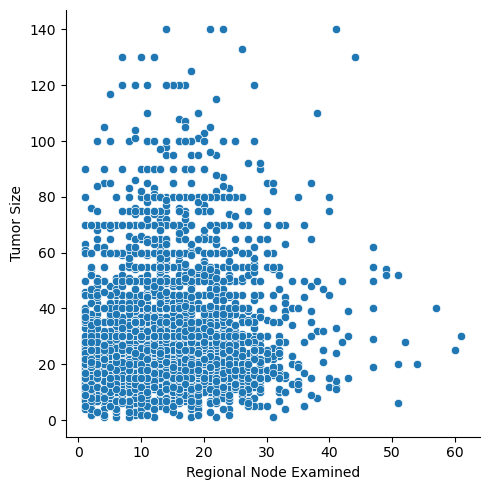

In [92]:
sns.relplot(x="Regional Node Examined", y="Tumor Size", data=df);

In [17]:
# USAR UM GET DUMMIES PARA OS GRAFICOS AQUI E TESTAR 

df_binary = pd.get_dummies(df, columns=['Race','Marital Status' , 'T Stage', '6th Stage', 'A Stage', 'Differentiate','N Stage' ])

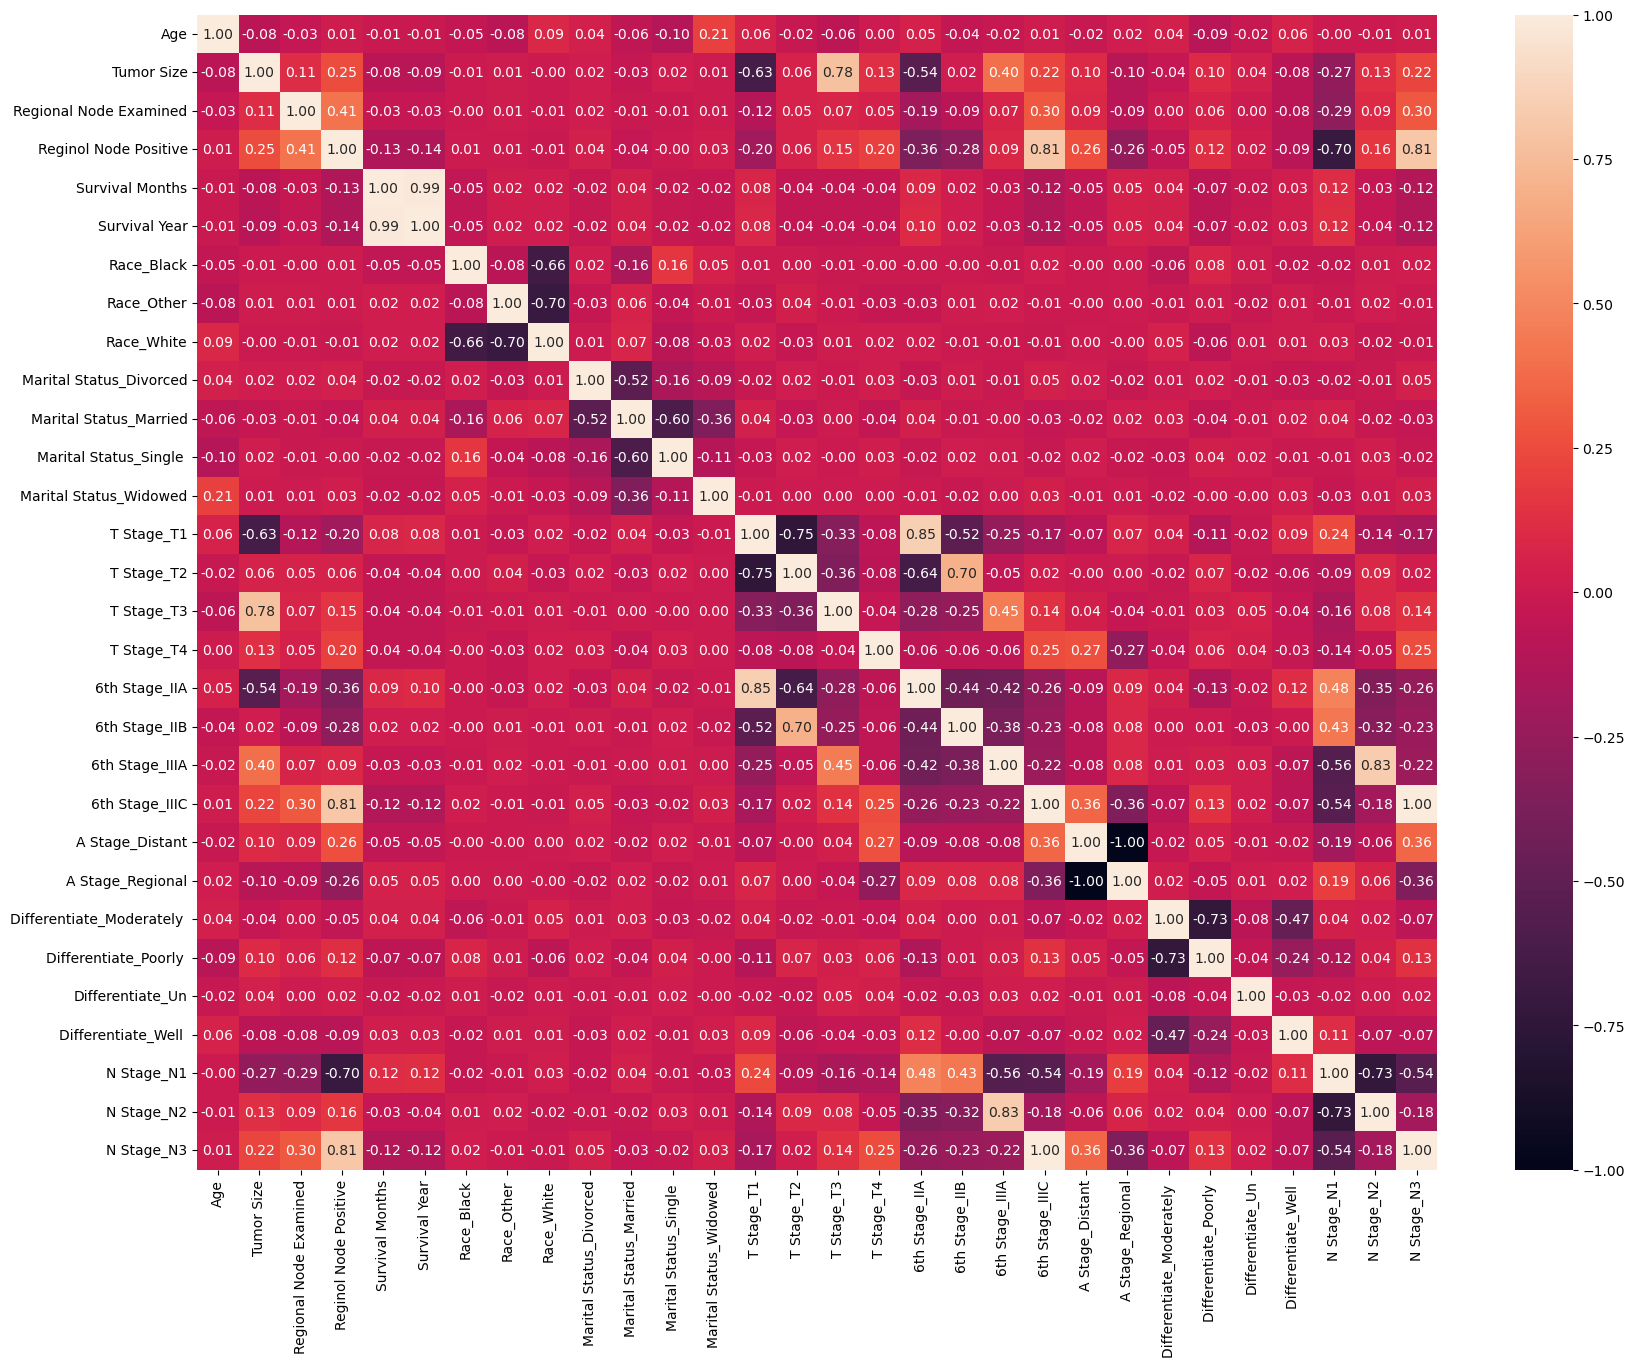

In [19]:
# Entendendo os principais fatores que contribuem 
plt.figure(figsize=(20,15))
sns.heatmap(data=df_binary.corr(), annot=True, fmt=".2f");

# Desafio

#### Essa etapa é extra e não é obrigatória. Ela é um desafio mais voltado para a parte de Machine Learning. Recomendamos que  você tente mesmo que não tenha familiaridade com o assunto, pois patricamente tudo pode ser encontrado com bastante facilidade na internet e nas documentações do sklearn.

### Vamos começar a preparar os dados para testar um modelo de classificação

#### Aplique a tranformação one hot encode nas variáveis que não são numéricas 
* Dica: Não esqueça de ficar apenas com a nova versão dessas variáveis nos passos seguintes

### PRÉ PROCESSAMENTO DOS DADOS 

In [14]:
# PRÉ PROCESSAMENTO DOS DADOS 
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
# from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [20]:
print(df_Treino.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
Survival Year             0
dtype: int64


In [21]:
df_Treino.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival Year
0,68.0,White,Married,T1,N1,IIA,Poorly,Regional,4.0,1,1,24,1,60,0,5
1,50.0,White,Married,T2,N2,IIIA,Moderately,Regional,54.0,1,1,14,5,62,0,5
2,58.0,White,Divorced,T3,N3,IIIC,Moderately,Regional,63.0,1,1,14,7,75,0,6
3,58.0,White,Married,T1,N1,IIA,Poorly,Regional,54.0,1,1,2,1,84,0,7
4,47.0,White,Married,T2,N1,IIB,Poorly,Regional,41.0,1,1,3,1,50,0,4


In [35]:
features_categoricas = [['Race','Marital Status' , 'T Stage', '6th Stage', 'A Stage', 'Differentiate','N Stage' ]]

encoder = OrdinalEncoder()


# Iterar sobre as colunas especificadas e codificar cada uma
for coluna in features_categoricas:
    df_Treino[coluna] = encoder.fit_transform(df_Treino[coluna])

# define example

# print("Data: ", features_categoricas)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(features_categoricas)
# print("Label Encoder:" ,integer_encoded)

# # onehot encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print("OneHot Encoder:", onehot_encoded)

# #Binary encode
# lb = LabelBinarizer()
# print("Label Binarizer:", lb.fit_transform(features_categoricas))

# encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
# encoder.fit(data)
# encoder.transform(new_data)

# one_hot_enc = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'),
#     colunas_categoricas),
#     remainder='passthrough')

# dados = one_hot_enc.fit_transform(dados)
# dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
# dados


In [15]:
# USAR UM GET DUMMIES PARA OS GRAFICOS AQUI E TESTAR 

df_Treino = pd.get_dummies(df_Treino, columns=['Race','Marital Status' , 'T Stage', '6th Stage', 'A Stage', 'Differentiate','N Stage' ])

In [16]:
df_Treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 4023
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3912 non-null   float64
 1   Tumor Size                 3912 non-null   float64
 2   Estrogen Status            3912 non-null   int64  
 3   Progesterone Status        3912 non-null   int64  
 4   Regional Node Examined     3912 non-null   int64  
 5   Reginol Node Positive      3912 non-null   int64  
 6   Survival Months            3912 non-null   int64  
 7   Status                     3912 non-null   int64  
 8   Survival Year              3912 non-null   int64  
 9   Race_Black                 3912 non-null   uint8  
 10  Race_Other                 3912 non-null   uint8  
 11  Race_White                 3912 non-null   uint8  
 12  Marital Status_Divorced    3912 non-null   uint8  
 13  Marital Status_Married     3912 non-null   uint8

### Vamos iniciar aqui Feature engineer e Tratamento das variaveis 

In [17]:
dataset_x = df_Treino.copy()
dataset_y = dataset_x.pop("Status")

In [18]:
discrete_features = dataset_x.dtypes == int

In [21]:
def make_mi_scores(dataset_x, dataset_y, discrete_features):
    mi_scores = mutual_info_regression(dataset_x, dataset_y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=dataset_x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(dataset_x, dataset_y, discrete_features)
mi_scores[::2]*100  # show a few features with their MI scores

Survival Months              13.453619
Reginol Node Positive         3.461600
T Stage_T1                    2.768599
Differentiate_Moderately      2.612708
N Stage_N3                    2.301140
Differentiate_Well            1.774668
T Stage_T3                    1.703494
Age                           1.222717
Race_White                    0.768699
Race_Other                    0.415332
Marital Status_Divorced       0.380549
Tumor Size                    0.000000
A Stage_Distant               0.000000
Marital Status_Single         0.000000
Differentiate_Un              0.000000
Progesterone Status           0.000000
Name: MI Scores, dtype: float64

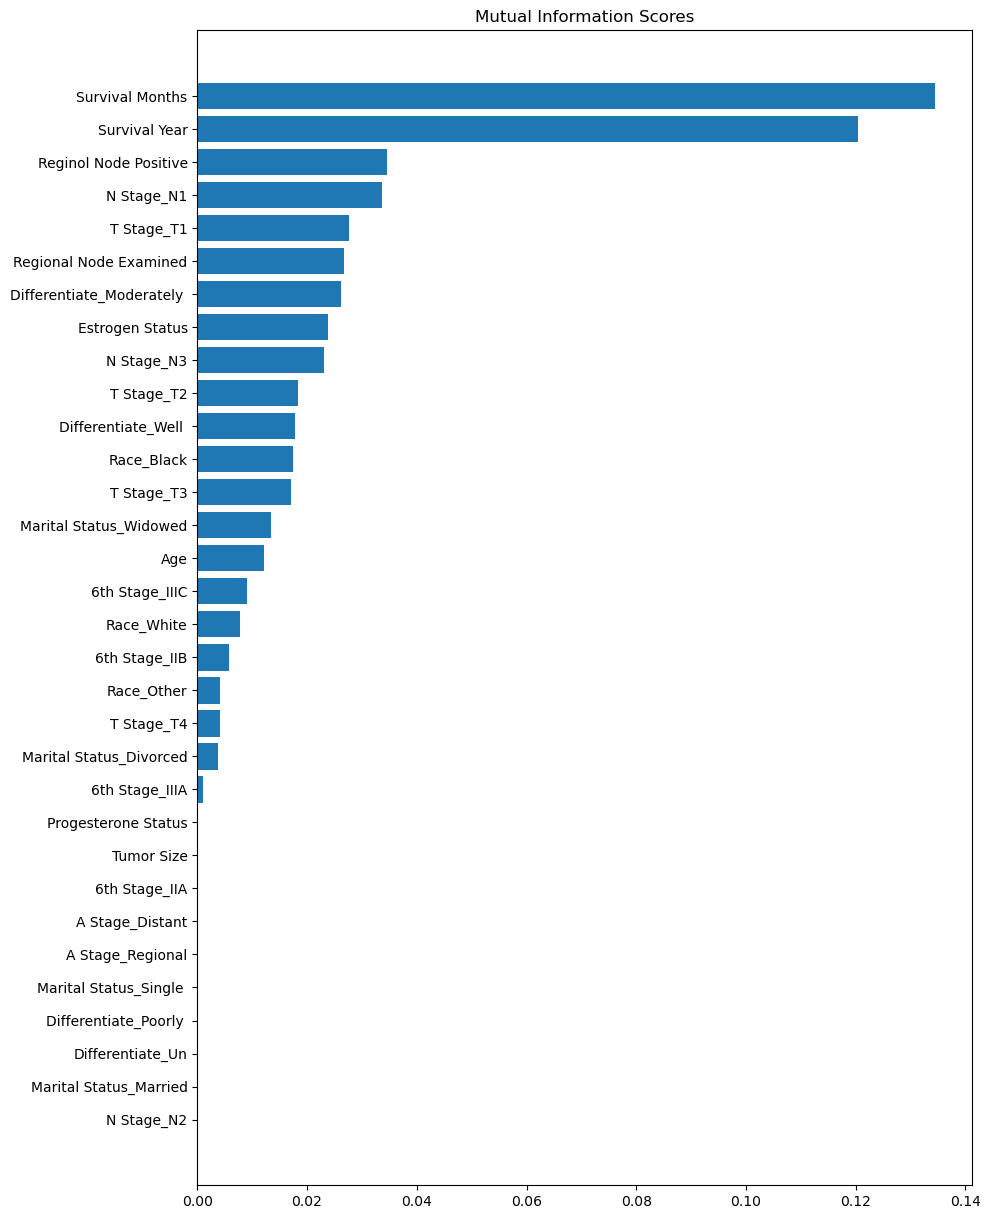

In [22]:
# PLOTANDO AS PRINCIPAIS FEATURES 
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 15))
plot_mi_scores(mi_scores)

In [103]:
df_Treino.head()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival Year,Race_Black,...,6th Stage_IIIC,A Stage_Distant,A Stage_Regional,Differentiate_Moderately,Differentiate_Poorly,Differentiate_Un,Differentiate_Well,N Stage_N1,N Stage_N2,N Stage_N3
0,68.0,4.0,1,1,24,1,60,0,5,0,...,0,0,1,0,1,0,0,1,0,0
1,50.0,54.0,1,1,14,5,62,0,5,0,...,0,0,1,1,0,0,0,0,1,0
2,58.0,63.0,1,1,14,7,75,0,6,0,...,1,0,1,1,0,0,0,0,0,1
3,58.0,54.0,1,1,2,1,84,0,7,0,...,0,0,1,0,1,0,0,1,0,0
4,47.0,41.0,1,1,3,1,50,0,4,0,...,0,0,1,0,1,0,0,1,0,0


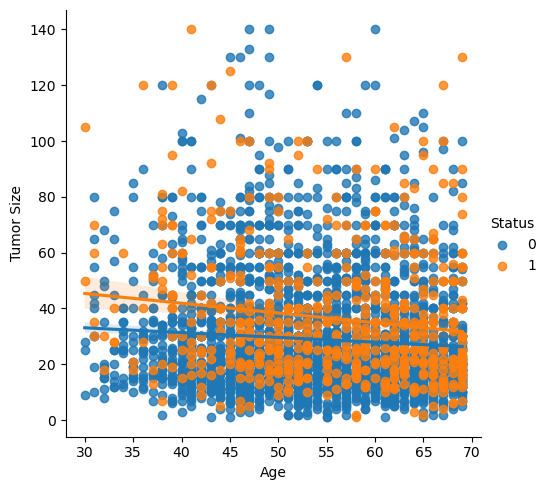

In [116]:
sns.lmplot(x="Age", y="Tumor Size", hue="Status", data=df_Treino);

### Separe o conjunto de dados em dois grupos: treino e teste nas proporções de 70% e 30% respectivamente.
* Lembre-se que primeiro vai ser preciso separar as features do target antes de usar o train_test_split. Nosso target é a coluna 'Status'.
* Estamos lidando com dados desbalanceados, então pode ser legal setar o argumento stratify do train_test_split usando a variável target.

In [24]:
# IMPORTANDO SO MODELOS DE CLASSIFICAÇÃO 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# IMPORTANDO AS MÉTRICAS QUE SERÃO UTILIZADA 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [25]:
# Com get Dummies ['Marital Status_Single', 'Marital status_Separated', 'Marital Status_Married', 'N Stage_N2', 'T Stage_T1', 'Race_Other',' Regional Node Examinaded', 'Differentiate_Moderately', 'T Stage_T2']
# , 'Marital Status_Widowed','6th Stage_IIB' ,'A Stage_Distant', 'Marital Status_Divorced', 'N Stage_N2', 'T Stage_T1', 'Race_Black','Race_White','Race_Other','Regional Node Examined', 'Differentiate_Moderately ','Differentiate_Un','Differentiate_Well ', 'T Stage_T2'

x = df_Treino.drop(columns = ['Status'], axis = 1)
y = df_Treino['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

print(x_train.shape, 
      x_test.shape, 
      y_train.shape,
      y_test.shape)

(1173, 32) (2739, 32) (1173,) (2739,)


### Agora vamos treinar uma Árvore de Decisão nos dados de treino
* Comece com uma primeira versão definindo apenas o parâmetro max_depth = 3
* Dica: Não é preciso reescalonar as variáveis numéricas porque estamos usando uma Decision Tree.

### As analises em si estão para modelos de Classificação pois as variaveis são categóricas 
A Classificação é uma das categorias de problemas de Machine Learning mais importantes e mais populares e o objetivo do algoritmo é aprender uma regra geral que mapeie as entradas nas saídas corretamente. Conforme já mencionamos, os dados de entrada podem ser divididos em dois grupos: X, com os atributos a serem utilizados na determinação da classe de saída e Y, que representa a classe de saída (o atributo para o qual se deseja fazer a predição do valor da classe), sendo que em problemas de Classificação, o Y é sempre categórico.

Informalmente, um problema de Classificação pode ser definido como a busca por uma função matemática que permita associar corretamente cada exemplo Xi de um conjunto de dados a um único rótulo categórico, Yi, denominado classe. Esta função, uma vez identificada, poderá ser aplicada a novos dados para prever suas respectivas classes.

Já os modelos para previsão/ Regressão
Podemos pensar que a previsão é como algo que pode acontecer no futuro. E assim como na previsão , identificamos ou prevemos os dados ausentes ou indisponíveis para uma nova observação com base nos dados anteriores que temos e com base nas suposições futuras. Na previsão, a saída é um valor contínuo.

In [26]:
# Arvore de decisão  

model_decisiontree = DecisionTreeClassifier()

# training fit 
model_decisiontree.fit(x_train,y_train)

# predict
decisionTreePred = model_decisiontree.predict(x_test)

# acuracy
acc_decisiontree = round(model_decisiontree.score(x_test, y_test)*100,2)

#precision model 
decisionTreePrecision = round(precision_score(y_test, decisionTreePred)*100,2)

# F1 Score
decisionTreeF1_score = round(f1_score(y_test, decisionTreePred)*100,2)

#recall 
decisionTree_Recall = round(recall_score(y_test, decisionTreePred)*100,2)

In [27]:
model_LogisticRegress = LogisticRegression()

#Fit the model
model_LogisticRegress.fit(x_train,y_train)

# predict
logRegressPred = model_LogisticRegress.predict(x_test)

#Accuracy
acc_logreg = round(model_LogisticRegress.score(x_test, y_test)*100,2)

#precision model 
logRegressPrecision = round(precision_score(y_test, logRegressPred)*100,2)

# F1 Score
logRegressF1_score = round(f1_score(y_test, logRegressPred)*100,2)

#recall 
logRegr_Recall = round(recall_score(y_test, logRegressPred)*100,2)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
# Arvore de decisão extra 

model_extraDecisiontree = ExtraTreesClassifier()

model_extraDecisiontree.fit(x_train,y_train)

# predict
extraDecisionTreePred = model_extraDecisiontree.predict(x_test)

## acuracy
acc_extraDecisiontree = round(model_extraDecisiontree.score(x_test, y_test)*100,2)

#Precisão do Modelo
extraDecisionTreePrecision = round(precision_score(y_test, extraDecisionTreePred)*100,2)

# F1 Score
extraDecisionTreeF1_score = round(f1_score(y_test, extraDecisionTreePred)*100,2)

#recall 
extraDecisionTree_recall = round(recall_score(y_test, extraDecisionTreePred)*100,2)

In [29]:
model_randomForest = RandomForestClassifier()

#Fit the model
model_randomForest.fit(x_train,y_train)

# predict
randomForestPred = model_randomForest.predict(x_test)

#Accuracy
acc_randomForest = round(model_randomForest.score(x_test, y_test)*100,2)

#Precisão do Modelo
RandomForestPrecision = round(precision_score(y_test, extraDecisionTreePred)*100,2)

# F1 Score
randomForest_F1_score = round(f1_score(y_test, randomForestPred)*100,2)

#recall 
randomForest_Recall = round(recall_score(y_test, randomForestPred)*100,2)

### Agora use o  'classification_report' do sklearn para mostrar os resultados do seu modelo inicial

In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
              'Extra Decision Tree', 'Random Forest Tree'],
    'Accuracy': [acc_logreg, acc_decisiontree, acc_extraDecisiontree, acc_randomForest],

    'Precision':[logRegressPrecision,decisionTreePrecision,extraDecisionTreePrecision,RandomForestPrecision],

    'Recall': [logRegr_Recall, decisionTree_Recall, extraDecisionTree_recall,randomForest_Recall], 

    'F1 Score': [logRegressF1_score, decisionTreeF1_score, extraDecisionTreeF1_score, randomForest_F1_score]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest Tree,90.84,70.36,50.86,62.14
0,Logistic Regression,89.41,72.20,46.17,56.33
2,Extra Decision Tree,88.97,70.36,43.95,54.10
1,Decision Tree,83.06,43.71,50.62,46.91


In [31]:
print('***** Random Forest ******\n')

print(classification_report(y_test, randomForestPred))

print('*****Logistic Regression*******\n')

print(classification_report(y_test, logRegressPred))

print('*****Extra Decision Tree*****\n')

print(classification_report(y_test, extraDecisionTreePred))

***** Random Forest ******

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2334
           1       0.80      0.51      0.62       405

    accuracy                           0.91      2739
   macro avg       0.86      0.74      0.78      2739
weighted avg       0.90      0.91      0.90      2739

*****Logistic Regression*******

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2334
           1       0.72      0.46      0.56       405

    accuracy                           0.89      2739
   macro avg       0.82      0.72      0.75      2739
weighted avg       0.88      0.89      0.88      2739

*****Extra Decision Tree*****

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2334
           1       0.70      0.44      0.54       405

    accuracy                           0.89      2739
   macro avg       0.81      0.70   

### Matriz de Confusão Para avaliar o Modelo (Random Forest)

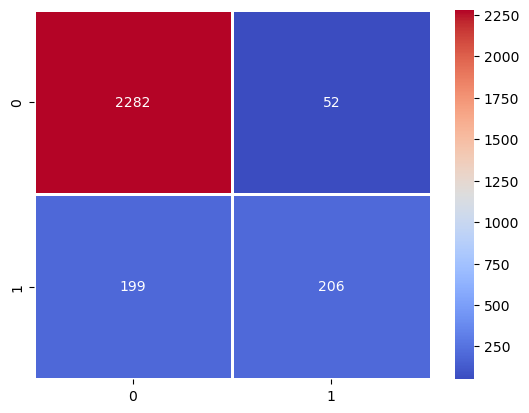

In [32]:
sns.heatmap(confusion_matrix(y_test, randomForestPred), cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### Matriz de Confusão Para avaliar o Modelo (Logistic Regression)

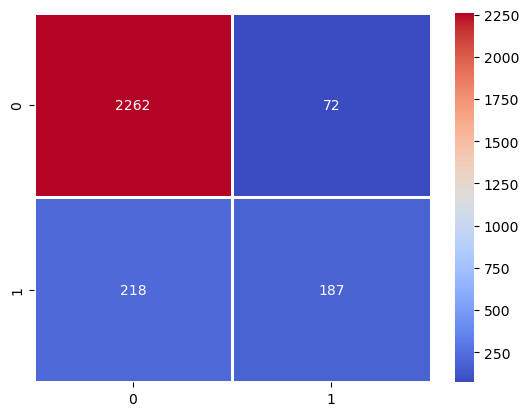

In [33]:
sns.heatmap(confusion_matrix(y_test, logRegressPred), cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### Agora Utilize o Grid-Search para encontrar a melhor combinação de hiperparâmetros para otimizar o que você julgou mais importante (precisão ou recall)
##### Para isso utilize os seguintes valores:
* max_depth: 2, 3, 4 e 5
* min_samples_split: 50, 100, 200, 300 e 500

**Dica:**  Sete o parâmetro **scoring** como 'precision' ou 'recall'

In [47]:
# Exemplo dos parâmetros que quero testar.
parametros = {'max_depth': [2,3,4,5],
              'min_samples_split': [50,100,200,300,500]}

# Criação do objeto do GridSearchCV.
grid_decisionTree = GridSearchCV(estimator = model_decisiontree,
                    param_grid = parametros,
                    scoring = 'precision')                  

# # Treinando o grid.
grid_decisionTree.fit(x_train, y_train)

print('Best hyperparameters are: '+str(grid_decisionTree.best_params_))
print('Best score is: '+str(grid_decisionTree.best_score_))

Best hyperparameters are: {'max_depth': 3, 'min_samples_split': 50}
Best score is: 0.8668253968253967


In [35]:
pd.DataFrame(grid.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008022,0.002540,0.003597,0.001730,2,50,"{'max_depth': 2, 'min_samples_split': 50}",0.882353,0.75,0.777778,0.72,0.625,0.751026,0.083437,4
1,0.004598,0.000493,0.004402,0.001495,2,100,"{'max_depth': 2, 'min_samples_split': 100}",0.882353,0.75,0.727273,0.72,0.625,0.740925,0.082640,6
2,0.009279,0.003261,0.007703,0.002569,2,200,"{'max_depth': 2, 'min_samples_split': 200}",0.882353,0.75,0.727273,0.72,0.625,0.740925,0.082640,6
3,0.006856,0.002118,0.005598,0.002728,2,300,"{'max_depth': 2, 'min_samples_split': 300}",0.882353,0.75,0.727273,0.72,0.625,0.740925,0.082640,6
4,0.003679,0.000779,0.002797,0.001476,2,500,"{'max_depth': 2, 'min_samples_split': 500}",0.882353,0.75,0.727273,0.72,0.625,0.740925,0.082640,6


## GridSearch Para o Modelo Random Forest

In [46]:
# GRID SEARC PARA O RANDOM FOREST 
grid_space={'max_depth': [2,3,4,5],
            'min_samples_split': [50,100,200,300,500]}

gridRandomForest = GridSearchCV(model_randomForest,param_grid=grid_space,cv=3,scoring='accuracy')

gridRandomForest.fit(x_train, y_train)

print('Best hyperparameters are: '+str(gridRandomForest.best_params_))
print('Best score is: '+str(gridRandomForest.best_score_))

Best hyperparameters are: {'max_depth': 4, 'min_samples_split': 50}
Best score is: 0.8976982097186701


In [42]:
pd.DataFrame(gridRandomForest.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.208342,0.080630,0.020251,0.004500,2,50,"{'max_depth': 2, 'min_samples_split': 50}",0.874680,0.856777,0.879795,0.870418,0.009869,8
1,0.135906,0.006236,0.018979,0.002391,2,100,"{'max_depth': 2, 'min_samples_split': 100}",0.854220,0.849105,0.892583,0.865303,0.019403,10
2,0.227131,0.110328,0.005822,0.005705,2,200,"{'max_depth': 2, 'min_samples_split': 200}",0.851662,0.849105,0.859335,0.853367,0.004347,13
3,0.133261,0.013842,0.016708,0.000476,2,300,"{'max_depth': 2, 'min_samples_split': 300}",0.851662,0.849105,0.854220,0.851662,0.002088,14
4,0.122285,0.008462,0.015925,0.000451,2,500,"{'max_depth': 2, 'min_samples_split': 500}",0.851662,0.849105,0.849105,0.849957,0.001206,16


## GridSearch Para o Modelo Logistic Regression

In [45]:
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

grid_lr = GridSearchCV(model_LogisticRegress, 
                       param_grid = grid_values, 
                       cv=3, 
                       scoring = 'precision')

grid_lr.fit(x_train, y_train)

print('Best hyperparameters are: '+str(grid_lr.best_params_))
print('Best score is: '+str(grid_lr.best_score_))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Best hyperparameters are: {'C': 0.1, 'penalty': 'l2'}
Best score is: 0.796476405671808


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [44]:
pd.DataFrame(grid_lr.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002791,0.002976,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,6
1,0.074886,0.013356,0.008433,0.005457,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.821429,0.862069,0.631579,0.771692,0.100455,2
2,0.000667,0.000472,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,7
3,0.091870,0.084027,0.000667,0.000943,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.851852,0.896552,0.641026,0.796476,0.111425,1
4,0.006425,0.006961,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,8


**Qual foi a melhor combinação de parâmetros obtida?**

### Use novamente o 'classification_report' para mostrar os resultados do modelo para os conjuntos de treino e teste usando a melhor combinação de parâmetros obtidas no passo anterior

In [48]:
print(classification_report(y_test, decisionTreePred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2334
           1       0.44      0.51      0.47       405

    accuracy                           0.83      2739
   macro avg       0.67      0.70      0.68      2739
weighted avg       0.84      0.83      0.84      2739



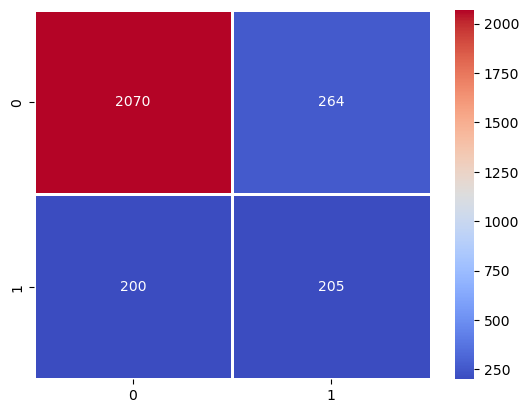

In [49]:
sns.heatmap(confusion_matrix(y_test, decisionTreePred), cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### Avaliação do Modelo Regressão Logistica depois do GridSearch

In [50]:
print(classification_report(y_test, logRegressPred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2334
           1       0.72      0.46      0.56       405

    accuracy                           0.89      2739
   macro avg       0.82      0.72      0.75      2739
weighted avg       0.88      0.89      0.88      2739



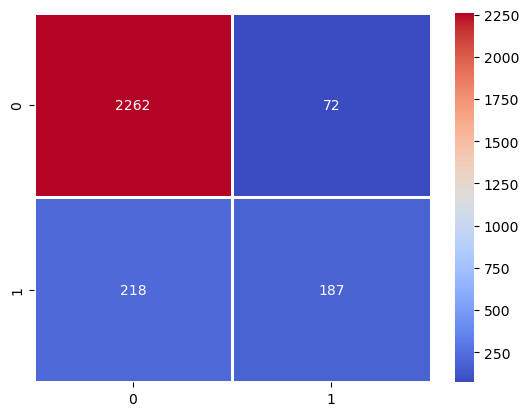

In [52]:
sns.heatmap(confusion_matrix(y_test, logRegressPred), cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

## Avaliando o Modelo de Random Forest Depois do Gread Search

In [53]:
print(classification_report(y_test, randomForestPred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2334
           1       0.80      0.51      0.62       405

    accuracy                           0.91      2739
   macro avg       0.86      0.74      0.78      2739
weighted avg       0.90      0.91      0.90      2739



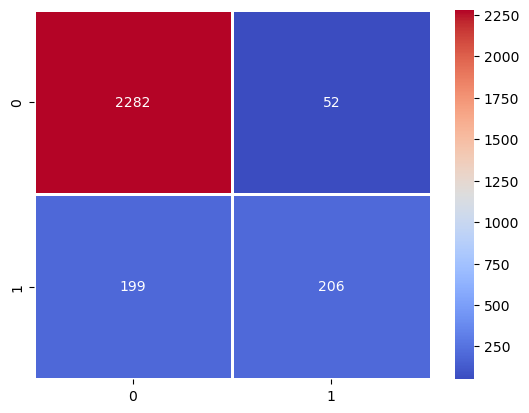

In [54]:
sns.heatmap(confusion_matrix(y_test, randomForestPred), cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### Uso do Shap Para verificar as variaveis mais influentes no modelo 

In [55]:
shap.initjs()

In [56]:
explainer_model_decisiontree = shap.TreeExplainer(model_decisiontree)
shap_test_model_decisiontree = explainer_model_decisiontree.shap_values(x_test)

In [59]:
# Variaveis influente no modelo 
shap.force_plot(explainer_model_decisiontree.expected_value[1], shap_test_model_decisiontree[1][0,:], x_test.iloc[0,:])

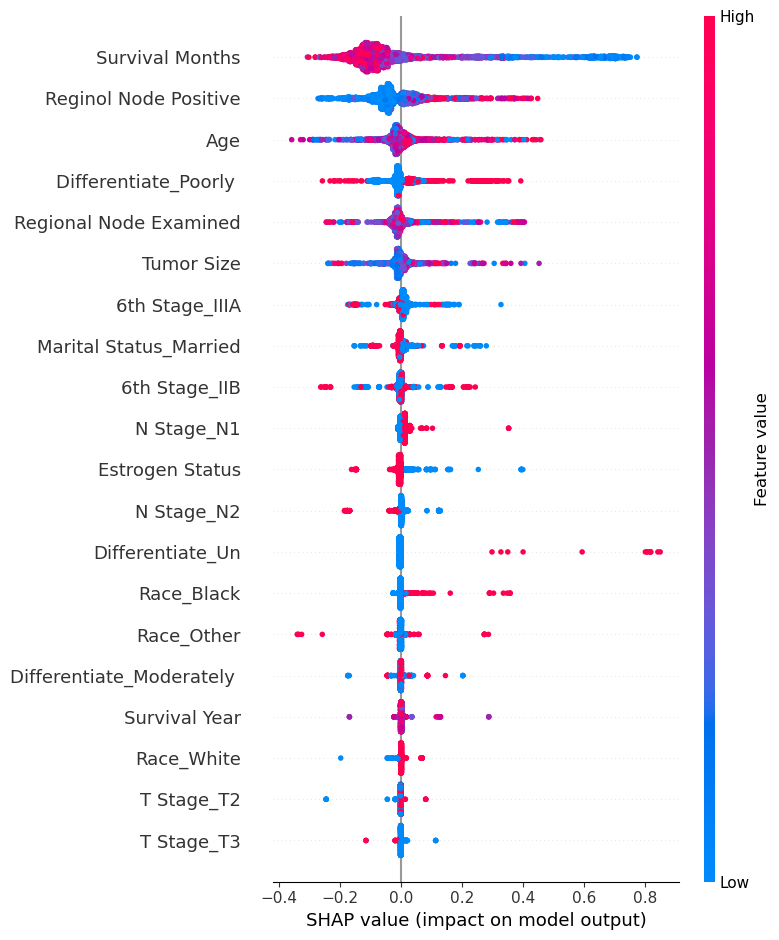

In [60]:
shap.summary_plot(shap_test_model_decisiontree[1], x_test)

## Cross Validation 

Depois de todas as analises e avaliações a melhor escolha foi O random forest
Dito isto Vamos usar o Cross validation para o modelo 

In [62]:
# Verifica predição

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_randomForest, x, y, cv=10, scoring='accuracy')
scores.sort()
accuracy = scores.mean()
print(scores)
print(accuracy)

[0.89002558 0.89258312 0.89514066 0.89514066 0.90306122 0.90792839
 0.91581633 0.91815857 0.92327366 0.9258312 ]
0.9066959392452633


In [ ]:
# SUBMISSION DO MODELO

# submission = pd.DataFrame({
#     'ID_Aluno': df_resposta['ID_Aluno'],
#     'Abandono_curso': model_randomForest.predict(df_resposta)
# })



# # Selecionando as 1239 primeiras linhas
# submission_df_subset = submission.head(1238)

# # Verificando o número de linhas no DataFrame de submissão
# print("Número de linhas no DataFrame de submissão:", len(submission_df_subset))

# # Salvar as 1239 primeiras linhas do DataFrame como um arquivo CSV para submissão
# submission_df_subset.to_csv('Sample_Submission.csv', index=False) 
# print("Arquivo de submissão criado com as 1238 primeiras linhas.")